# 實作感知器-Iris data-set

In [3]:
import numpy as np 

class  Perceptron(object):
    """Perceptron classifier.#感知器
    Parameters
    ------------
    eta : float 學習速率 ( 0 ~ 1.0)
    n_iter : int 迭代次數
    random_state : int 初始化的隨機種子

    Attributes
    -----------
    w_ : 1d-array 配適過後的權重向量
    errors_ : list 儲存每輪的錯誤分類
    """
    def __init__(self,eta=0.01, n_iter = 50,random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self,X,y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          訓練用的向量,n_samples : 樣本數
          n_features : 特徵數.
        y : array-like, shape = [n_samples]
          目標變數.
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        #設定隨機種子
        #class裡面最好用 RandomState這種物件化來讓程式保持彈性                                                   
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        #亂數產生符合常態分布的隨機矩陣
        self.errors_ = []
        for _ in range(self.n_iter): #_是隨便一個不關心的變量(非約定俗成)
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update    #誤差項常數(偏誤單元)
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    #np.dot 矩陣點積

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
 

In [2]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


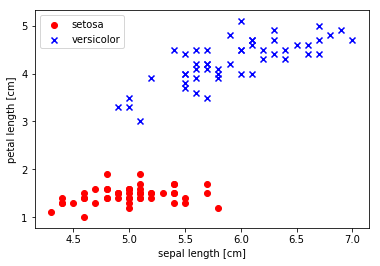

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

In [26]:
for i,m,l in zip(X,y,range(10)):
        print(i,m)
#看一下iris頭10筆資料

[5.1 1.4] -1
[4.9 1.4] -1
[4.7 1.3] -1
[4.6 1.5] -1
[5.  1.4] -1
[5.4 1.7] -1
[4.6 1.4] -1
[5.  1.5] -1
[4.4 1.4] -1
[4.9 1.5] -1


## 感知器運作軌跡(讓自己更了解運作原理)

In [76]:
rgen = np.random.RandomState(1)
#初始權重
w = rgen.normal(loc = 0,scale = 0.01,size =  1+X.shape[1])
print('初始權重')
print(w)
# 第一次更新權重
for i in range(2):
    print('####################第' + str(i+1) + '輪####################')
    count = 0
    for xi ,target in zip(X,y):
        count += 1
        print('第',str(count),'筆資料')
        print('x value:',xi)
        net_input =  np.dot(xi,w[1:]) + w[0]
        print('運算內積:',net_input)
        predict = np.where(net_input >= 0 ,1,-1)
        print('預測:',predict)
        update = 0.01 * (target - predict)
        print('更新權重:如果預測對,更新後的權重不變')
        print('更新權重:',update)
        w[1:] += update * xi
        w[0] += update
        print('更新後權重',w)


初始權重
[ 0.01624345 -0.00611756 -0.00528172]
####################第1輪####################
第 1 筆資料
x value: [5.1 1.4]
運算內積: -0.022350527991209804
預測: -1
更新權重:如果預測對,更新後的權重不變
更新權重: 0.0
更新後權重 [ 0.01624345 -0.00611756 -0.00528172]
第 2 筆資料
x value: [4.9 1.4]
運算內積: -0.021127015163909656
預測: -1
更新權重:如果預測對,更新後的權重不變
更新權重: 0.0
更新後權重 [ 0.01624345 -0.00611756 -0.00528172]
第 3 筆資料
x value: [4.7 1.3]
運算內積: -0.019375330584346054
預測: -1
更新權重:如果預測對,更新後的權重不變
更新權重: 0.0
更新後權重 [ 0.01624345 -0.00611756 -0.00528172]
第 4 筆資料
x value: [4.6 1.5]
運算內積: -0.019819917675222884
預測: -1
更新權重:如果預測對,更新後的權重不變
更新權重: 0.0
更新後權重 [ 0.01624345 -0.00611756 -0.00528172]
第 5 筆資料
x value: [5.  1.4]
運算內積: -0.021738771577559733
預測: -1
更新權重:如果預測對,更新後的權重不變
更新權重: 0.0
更新後權重 [ 0.01624345 -0.00611756 -0.00528172]
第 6 筆資料
x value: [5.4 1.7]
運算內積: -0.025770312488950405
預測: -1
更新權重:如果預測對,更新後的權重不變
更新權重: 0.0
更新後權重 [ 0.01624345 -0.00611756 -0.00528172]
第 7 筆資料
x value: [4.6 1.4]
運算內積: -0.01929174592295943
預測: -1
更新權重:如果預測對,更新後的權重不變
更新權重: 0.0
更新後權重 

x value: [5.6 4.2]
運算內積: 0.9622018808771632
預測: 1
更新權重:如果預測對,更新後的權重不變
更新權重: 0.0
更新後權重 [0.01624345 0.07388244 0.12671828]
第 96 筆資料
x value: [5.7 4.2]
運算內積: 0.9695901244635131
預測: 1
更新權重:如果預測對,更新後的權重不變
更新權重: 0.0
更新後權重 [0.01624345 0.07388244 0.12671828]
第 97 筆資料
x value: [5.7 4.2]
運算內積: 0.9695901244635131
預測: 1
更新權重:如果預測對,更新後的權重不變
更新權重: 0.0
更新後權重 [0.01624345 0.07388244 0.12671828]
第 98 筆資料
x value: [6.2 4.3]
運算內積: 1.0192031706429994
預測: 1
更新權重:如果預測對,更新後的權重不變
更新權重: 0.0
更新後權重 [0.01624345 0.07388244 0.12671828]
第 99 筆資料
x value: [5.1 3. ]
運算內積: 0.7731987239725749
預測: 1
更新權重:如果預測對,更新後的權重不變
更新權重: 0.0
更新後權重 [0.01624345 0.07388244 0.12671828]
第 100 筆資料
x value: [5.7 4.1]
運算內積: 0.9569182962157766
預測: 1
更新權重:如果預測對,更新後的權重不變
更新權重: 0.0
更新後權重 [0.01624345 0.07388244 0.12671828]


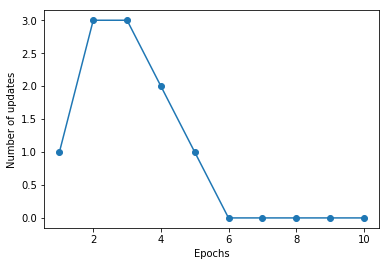

In [77]:
ppn = Perceptron(eta=0.01, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

In [31]:
from matplotlib.colors import ListedColormap

#A function for plotting decision regions
#畫出二維的決策區域
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    #畫出二維的決策區域
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #xx1,xx2 網格陣列(grid array)
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    #contourf()等高線圖(contour plot)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max()) m
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    #畫出原樣本的類別
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

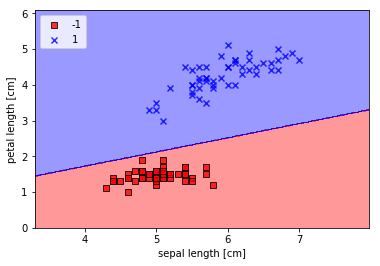

In [6]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

## Adaline 

In [27]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float 學習速率
    n_iter : int 迭代次數
    random_state : int 隨機種子

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list 成本函數

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
           #activation沒有任何影響,只是為了說明資訊如何經過啟動層
           #和perceptron不同,這裡是考慮整個樣本來計算梯度(batch)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

## Adaline(梯度下降)軌跡

In [25]:
rgen = np.random.RandomState(1)
#初始權重
w = rgen.normal(loc = 0,scale = 0.01,size =  1+X.shape[1])
print('初始權重')
print(w)
#成本函數
cost = []
#學習速率
eta = 0.0001 
for i in range(10):
    print('第'+str(i+1)+'輪')
    net_input = np.dot(X,w[1:]) + w[0]
    print('net_input head 5 :',net_input[0:5])
    errors = y - net_input
    print('errors head 5 :',errors[0:5])
    w[1:] += eta * X.T.dot(errors)
    w[0] += eta * errors.sum() 
    print('更新後權重:',w)
    cost = (errors **2).sum()/2
    print('cost:',cost)

初始權重
[ 0.01624345 -0.00611756 -0.00528172]
第1輪
net_input head 5 : [-0.02235053 -0.02112702 -0.01937533 -0.01981992 -0.02173877]
errors head 5 : [-0.97764947 -0.97887298 -0.98062467 -0.98018008 -0.97826123]
更新後權重: [0.01656687 0.00036629 0.00977937]
cost: 51.08122709777622
第2輪
net_input head 5 : [0.03212608 0.03205282 0.03100162 0.03292087 0.03208945]
errors head 5 : [-1.03212608 -1.03205282 -1.03100162 -1.03292087 -1.03208945]
更新後權重: [0.01610128 0.00239442 0.02222095]
cost: 48.734405003475466
第3輪
net_input head 5 : [0.05942216 0.05894328 0.0562423  0.06044705 0.05918272]
errors head 5 : [-1.05942216 -1.05894328 -1.0562423  -1.06044705 -1.05918272]
更新後權重: [0.0151733  0.00179159 0.03306557]
cost: 47.268121538341724
第4輪
net_input head 5 : [0.0706022  0.07024388 0.06657901 0.07301296 0.07042304]
errors head 5 : [-1.0706022  -1.07024388 -1.06657901 -1.07301296 -1.07042304]
更新後權重: [ 0.01397722 -0.00035671  0.04292209]
cost: 46.12749307431246
第5輪
net_input head 5 : [0.07224892 0.07232027 0.068

## 比較不同學習速率的梯度下降法

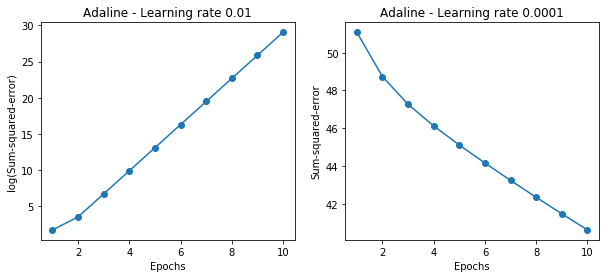

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1),np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

### 數據標準化
能幫助梯度下降法更快的收斂

In [29]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

#### eta0.01

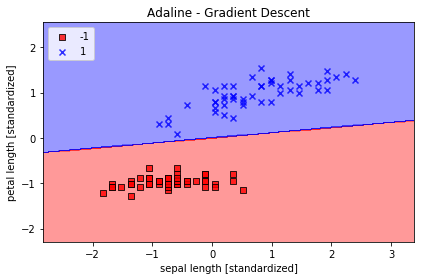

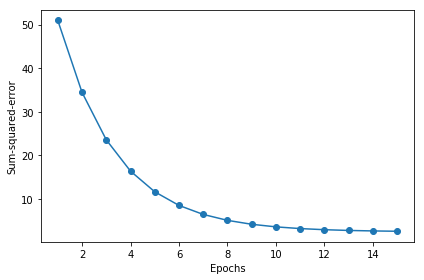

In [33]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

#### eta0.0001

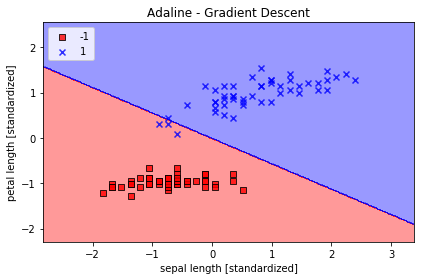

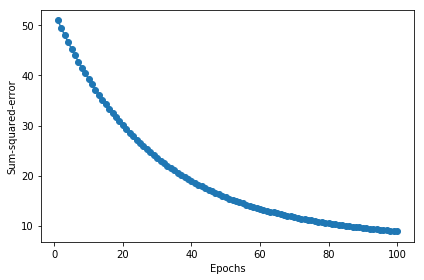

In [38]:
ada2 = AdalineGD(n_iter=100, eta=0.0001)
ada2.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada2)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

## 隨機梯度下降 stochastic gradient descent

In [12]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
    n_iter : int
    shuffle : bool (default: True) 數據在處理前是否要先攪亂位置(防止數據週期性的出現)
    random_state : int
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        #初始化權重
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            #逐筆更新權重
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            #每輪平均成本
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
       #不初始化權重
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """攪亂資料"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

### 學習速率0.01

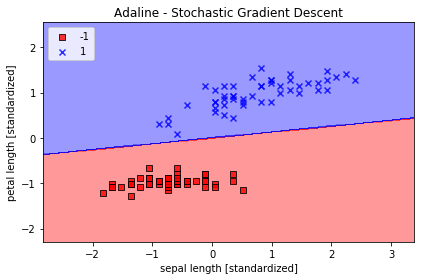

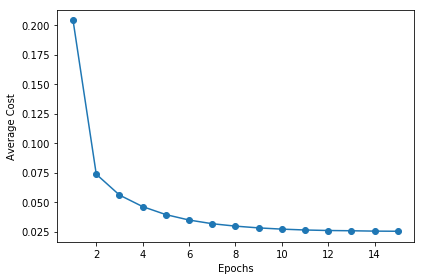

In [13]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y) #用標準化後資料

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()

如果數據要以線上串流方式修改模型,對個別樣本呼叫partial_fit就可以了.